In [1]:
import numpy as np
from sklearn.model_selection import train_test_split



In [2]:
a = np.arange(1,101)
print(a.shape)
print(a)
b = a.reshape(1,-1)#-1是指系統自己計算
print(b.shape)
print(b)

X = np.arange(1,101).reshape(-1,1)
y = np.arange(101,201)
print(X.shape)
print(y.shape)

(100,)
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
(1, 100)
[[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
   19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
   37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
   55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
   73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
   91  92  93  94  95  96  97  98  99 100]]
(100, 1)
(100,)


In [3]:
#切割資料集(訓練70% + 測試30%)
X_train, X_temp, y_train, y_temp  = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_temp.shape)
print(y_train.shape)
print(y_temp.shape)

(70, 1)
(30, 1)
(70,)
(30,)


In [4]:
#切割資料集(驗證15% + 測試15%)
X_val, X_test, y_val, y_test  = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(15, 1)
(15, 1)
(15,)
(15,)


In [5]:
X = np.arange(1,401).reshape(-1,2)
y = np.arange(501,701)

X_train, X_temp, y_train, y_temp  = train_test_split(X, y, test_size=0.25, random_state=42)
X_val, X_test, y_val, y_test  = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)
print(X_train.shape, X_temp.shape, y_train.shape, y_temp.shape, X_val.shape, X_test.shape, y_val.shape, y_test.shape)
print(X_train[:3])
print(X_temp[:3])
print(y_train[:3])
print(y_temp[:3])
print(X_val[:3])
print(X_test[:3])
print(y_val[:3])
print(y_test[:3])


(150, 2) (50, 2) (150,) (50,) (30, 2) (20, 2) (30,) (20,)
[[229 230]
 [347 348]
 [ 11  12]]
[[191 192]
 [ 31  32]
 [ 61  62]]
[615 674 506]
[596 516 531]
[[ 91  92]
 [113 114]
 [131 132]]
[[157 158]
 [153 154]
 [ 19  20]]
[546 557 566]
[579 577 510]


In [6]:
#交叉驗證(k-fold)
import numpy as np
from sklearn.model_selection import train_test_split , KFold , cross_val_score
from sklearn.linear_model import LinearRegression

X = np.array([[i] for i in range(1,101)])
y = np.array([2*i + np.random.randn()*5 for i in range(1,101)])
print(X[:5])
print(y[:5])

[[1]
 [2]
 [3]
 [4]
 [5]]
[ 0.07562188  6.95612449  2.65246238 14.75803882 10.84447411]


In [7]:
#線性回歸
model = LinearRegression()
kf = KFold(n_splits=2, shuffle=True, random_state=42)#n_splits劃分群數 shuffle是否打亂資料
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
print(scores)
print(f"每個fold的MSE:{np.abs(scores)}")
mean_mse = np.abs(scores).mean()
std_mse = np.abs(scores).std()
print(f"mean_mse:{mean_mse:.2f}")
print(f"std_mse:{std_mse:.2f}")

[-30.09652633 -23.39237987]
每個fold的MSE:[30.09652633 23.39237987]
mean_mse:26.74
std_mse:3.35


In [8]:
#細部解說
fold_idx = 1
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index] , X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #模型訓練
    model.fit(X_train,y_train)
    #預測結果
    y_pred = model.predict(X_test)
    #計算誤差
    from sklearn.metrics import mean_squared_error
    current_mse = mean_squared_error(y_test, y_pred)
    print(f"第{fold_idx}個fold:訓練樣本數:{len(X_train)}, 測試樣本數:{len(X_test)}, MSE={current_mse:.2f}")
    fold_idx+=1


第1個fold:訓練樣本數:50, 測試樣本數:50, MSE=30.10
第2個fold:訓練樣本數:50, 測試樣本數:50, MSE=23.39


In [12]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X,y = make_classification(n_samples=300, n_features=10, n_classes=2, random_state=42)
print(X.shape)
print(y.shape)
model = LogisticRegression(random_state = 42, solver = 'liblinear')
kf = KFold(n_splits=7, shuffle=True, random_state=42)
socres = cross_val_score(model,X , y, cv=kf, scoring='accuracy')
mean_accuracy = socres.mean()
std_accuracy = scores.std()
print(f"mean_accuracy: {mean_accuracy:.3f}")
print(f"std_accuracy: {std_accuracy:.3f}")

(300, 10)
(300,)
mean_accuracy: 0.923
std_accuracy: 3.352


In [22]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

X, y = make_classification(n_samples=300, n_features=20, n_classes=2, random_state=42)
model = LogisticRegression(random_state=42, solver='liblinear')
param_grid = {
    'C':[0.01,0.1,1,10,100],
    'penalty':['l1','l2']
}
for param, values in param_grid.items():
    print(f"{param}: {values}")
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1, cv=5)
grid_search.fit(X,y)
best_params = grid_search.best_params_
print(f"best_parms : {best_params}")
best_score = grid_search.best_score_
print(f"best_score: {best_score:.3f}")
best_model = grid_search.best_estimator_
print(f"best_model: {best_model}")

results_df = pd.DataFrame(grid_search.cv_results_)
print(results_df[['param_C','param_penalty','mean_test_score','std_test_score']].sort_values(by = 'mean_test_score', ascending=False))


C: [0.01, 0.1, 1, 10, 100]
penalty: ['l1', 'l2']
Fitting 5 folds for each of 10 candidates, totalling 50 fits
best_parms : {'C': 0.1, 'penalty': 'l1'}
best_score: 0.933
best_model: LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear')
   param_C param_penalty  mean_test_score  std_test_score
3     0.10            l2         0.933333        0.018257
2     0.10            l1         0.933333        0.025820
0     0.01            l1         0.930000        0.024495
4     1.00            l1         0.926667        0.027080
5     1.00            l2         0.923333        0.034319
1     0.01            l2         0.920000        0.026667
6    10.00            l1         0.913333        0.046428
7    10.00            l2         0.913333        0.046428
8   100.00            l1         0.913333        0.046428
9   100.00            l2         0.913333        0.046428


In [45]:
#test1
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

X_ex1, y_ex1 = make_classification(n_samples=250, n_features=20, n_classes=2, random_state=42)
model_ex1 = DecisionTreeClassifier(random_state=42)
param_grid_ex1 = {
    'max_depth':[3,5,7,None],
    'min_samples_split':[2,5,10]
}
for param, values in param_grid_ex1.items():
    print(f"{param}: {values}")
grid_search_ex1 = GridSearchCV(estimator=model_ex1, param_grid=param_grid_ex1, scoring='accuracy', verbose=1, n_jobs=-1, cv=4)
grid_search_ex1.fit(X_ex1, y_ex1)
best_params = grid_search_ex1.best_params_
print(f"best_parms : {best_params}")
best_score = grid_search_ex1.best_score_
print(f"best_score: {best_score:.3f}")
best_model = grid_search_ex1.best_estimator_
print(f"best_model: {best_model}")

results_df = pd.DataFrame(grid_search_ex1.cv_results_)

print(results_df[['param_max_depth','param_min_samples_split','mean_test_score','std_test_score']].sort_values(by = 'mean_test_score', ascending=False))

max_depth: [3, 5, 7, None]
min_samples_split: [2, 5, 10]
Fitting 4 folds for each of 12 candidates, totalling 48 fits
best_parms : {'max_depth': 3, 'min_samples_split': 2}
best_score: 0.856
best_model: DecisionTreeClassifier(max_depth=3, random_state=42)
   param_max_depth  param_min_samples_split  mean_test_score  std_test_score
0                3                        2         0.855863        0.036310
1                3                        5         0.855863        0.036310
2                3                       10         0.851895        0.038490
11            None                       10         0.827829        0.063886
8                7                       10         0.827829        0.063886
7                7                        5         0.827765        0.068050
10            None                        5         0.827765        0.068050
5                5                       10         0.823797        0.061500
4                5                        5         

In [46]:
#test2
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

X_ex2, y_ex2 = make_classification(n_samples=250, n_features=20, n_classes=2, random_state=7)
model_ex2 = LogisticRegression(penalty='12',random_state=7, solver='liblinear')
param_grid_ex2 = {
    'C':[0.001,0.01,0.1,1,10,100,1000],
    'penalty':['l2']
}
for param, values in param_grid_ex2.items():
    print(f"{param}: {values}")
grid_search_ex2 = GridSearchCV(estimator=model_ex2, param_grid=param_grid_ex2, scoring='accuracy', verbose=1, n_jobs=-1, cv=5)
grid_search_ex2.fit(X_ex2,y_ex2)
best_params = grid_search_ex2.best_params_
print(f"best_parms : {best_params}")
best_score = grid_search_ex2.best_score_
print(f"best_score: {best_score:.3f}")
best_model = grid_search_ex2.best_estimator_
print(f"best_model: {best_model}")

results_df = pd.DataFrame(grid_search_ex2.cv_results_)
print(results_df[['param_C','param_penalty','mean_test_score','std_test_score']].sort_values(by = 'mean_test_score', ascending=False))

C: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty: ['l2']
Fitting 5 folds for each of 7 candidates, totalling 35 fits
best_parms : {'C': 0.001, 'penalty': 'l2'}
best_score: 0.832
best_model: LogisticRegression(C=0.001, random_state=7, solver='liblinear')
    param_C param_penalty  mean_test_score  std_test_score
0     0.001            l2            0.832        0.044900
1     0.010            l2            0.816        0.055714
2     0.100            l2            0.800        0.060663
4    10.000            l2            0.800        0.075895
5   100.000            l2            0.800        0.075895
6  1000.000            l2            0.800        0.075895
3     1.000            l2            0.792        0.078588


In [ ]:
#隨機樹
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report

X, y = make_classification(n_samples=500, n_features=100, n_classes = 2 , random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
rf_classfiier = RandomForestClassifier(n_estimators=100, random_state=7, n_jobs=-1, max_features='sqrt')#n_estimators決策樹的數量 越多越好 吃效能
rf_classfiier.fit(X_train, y_train)
y_pred_rf = rf_classfiier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"accuracy_rf: {accuracy_rf:.3f}")
print(f"classification_report: {classification_report(y_test,y_pred_rf)}")


accuracy_rf: 0.813
classification_report:               precision    recall  f1-score   support

           0       0.77      0.92      0.84        78
           1       0.89      0.69      0.78        72

    accuracy                           0.81       150
   macro avg       0.83      0.81      0.81       150
weighted avg       0.83      0.81      0.81       150



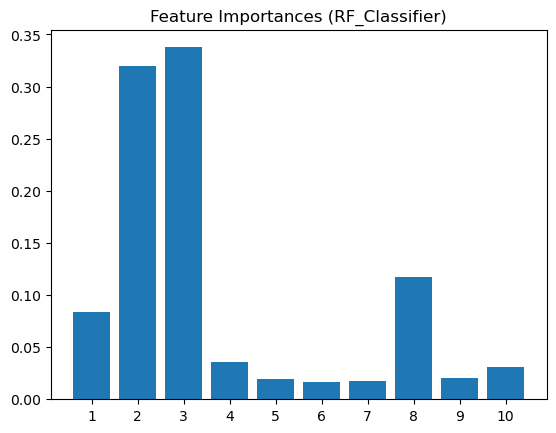

In [63]:
import matplotlib.pyplot as plt
importances = rf_classfiier.feature_importances_
plt.bar(range(len(importances)),importances)
plt.title("Feature Importances (RF_Classifier)")
plt.xticks(ticks=range(len(importances)), labels=range(1, len(importances)+1))
plt.show()

In [79]:
#隨機樹test1
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV

X, y = make_classification(n_samples=600, n_features=15, n_classes = 2 , random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

rf_classfiier = RandomForestClassifier(random_state=7, n_jobs=-1)#n_estimators決策樹的數量 越多越好 吃效能
param_grid_rf = {
    'n_estimators':[50,100,200],
    'max_depth':[5,10,None],
    'max_features':['sqrt',0.5,1.0]
}
#GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_classfiier, param_grid=param_grid_rf,cv=3, scoring='accuracy', n_jobs=-1 , verbose=1)
grid_search_rf.fit(X_train,y_train)


print(f"best_params:{grid_search_rf.best_params_}")
print(f"avg_accuracy:{grid_search_rf.best_score_:.3f}")
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"測試資料在最佳模型的正確率:{test_accuracy_rf:.3f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
best_params:{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
avg_accuracy:0.921
測試資料在最佳模型的正確率:0.911


In [1]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# 產生資料
X_ex2, y_ex2 = make_regression(n_samples=400, n_features=12, noise=30, random_state=42)

# 切分資料
X_train_ex2, X_test_ex2, y_train_ex2, y_test_ex2 = train_test_split(
    X_ex2, y_ex2, test_size=0.3, random_state=42
)

# 建立並訓練模型
rfr_model = RandomForestRegressor(n_estimators=150, random_state=42, n_jobs=-1)
rfr_model.fit(X_train_ex2, y_train_ex2)

# 預測
y_pred_rfr = rfr_model.predict(X_test_ex2)

# 評估
mse_ex2 = mean_squared_error(y_test_ex2, y_pred_rfr)
r2_ex2 = r2_score(y_test_ex2, y_pred_rfr)

print(f'mse_ex2: {mse_ex2:.3f}')
print(f'r2_ex2: {r2_ex2:.3f}')

# 特徵重要性
feature_importances = rfr_model.feature_importances_
feature_names = [f'Feature_{i}' for i in range(X_ex2.shape[1])]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)


mse_ex2: 9644.753
r2_ex2: 0.667
       Feature  Importance
6    Feature_6    0.410451
3    Feature_3    0.163247
9    Feature_9    0.156310
2    Feature_2    0.057581
10  Feature_10    0.040806
8    Feature_8    0.039076
5    Feature_5    0.030123
4    Feature_4    0.028397
7    Feature_7    0.020714
1    Feature_1    0.018214
0    Feature_0    0.018079
11  Feature_11    0.017001


In [6]:
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
X, y = make_classification(n_samples=500, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=42)
xgb_classifier = XGBClassifier(object='binary:logistic', n_estimators=100, learning_rate=0.1, eval_metric='logloss', random_state=42)
xgb_classifier.fit(X_train,y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"accuracy: {accuracy:.3f}")
print(classification_report(y_test, y_pred_xgb))

accuracy: 0.933
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        68
           1       0.99      0.89      0.94        82

    accuracy                           0.93       150
   macro avg       0.93      0.94      0.93       150
weighted avg       0.94      0.93      0.93       150



c:\Users\MSI-NB\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:23:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "object" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
from sklearn.datasets import make_regression
from xgboost import XGBRegressor   # 匯入 XGBoost 模型
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import pandas as pd
from sklearn.model_selection import train_test_split
# 產生資料
X_reg, y_reg = make_regression(n_samples=500, n_features=10, noise=30, random_state=42)
# 切分資料
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)
# 建立 XGBoost 回歸模型
xgb_regressor = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

# 訓練模型
xgb_regressor.fit(X_train_reg, y_train_reg)

# 預測
y_pred_reg = xgb_regressor.predict(X_test_reg)

# 評估指標
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
mape_reg = mean_absolute_percentage_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

print(f'mse_reg: {mse_reg:.3f}')
print(f'mape_reg: {mape_reg:.3f}')
print(f'r2_reg: {r2_reg:.3f}')

# 特徵重要性
feature_importances_reg = xgb_regressor.feature_importances_
feature_names_reg = [f'Feature_{i}' for i in range(X_reg.shape[1])]

importance_df_rgb = pd.DataFrame({
    'Feature': feature_names_reg,
    'Importance': feature_importances_reg
})

importance_df_rgb = importance_df_rgb.sort_values(by='Importance', ascending=False)
print(importance_df_rgb)

# 繪圖
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df_rgb['Feature'], importance_df_rgb['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("XGBoost Regressor Feature Importance")
plt.gca().invert_yaxis()  # 讓最重要的排在上面
plt.show()


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -m
